# Hypothese 1: Video’s met een expliciete CTA om een comment achter te laten, genereren significant meer comments dan video’s zonder een CTA.

Om te testen of video’s met een CTA significant meer comments genereren dan video’s zonder CTA, wordt de Mann-Whitney U-test toegepast. Deze test is geschikt voor kleine steekproeven en vergelijkt de verdeling van comments tussen beide groepen zonder aanname van normaliteit. Daarnaast wordt de effectgrootte (Cliff’s delta) berekend om de praktische relevantie van eventuele verschillen te kwantificeren.

## Stap 1: Klaarzetten van de notebook.

In deze stap worden alle nodige libraries en data ingeladen en klaargezet.<br>
Dit vereenvoudigt het verdere verloop van de notebook.

In [6]:
# Importeer standaard libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
# Importeer de data
videos = pd.read_excel('../output/videos.xlsx')

## Stap 2: Uitvoeren van de verschillende analyses

In [14]:
# Splits de data op in twee groepen: video's met en zonder CTA
videos_with_cta = videos[videos['has_CTA']]
videos_without_cta = videos[~videos['has_CTA']]

comments_with_cta = videos_with_cta['comments']
comments_without_cta = videos_without_cta['comments']

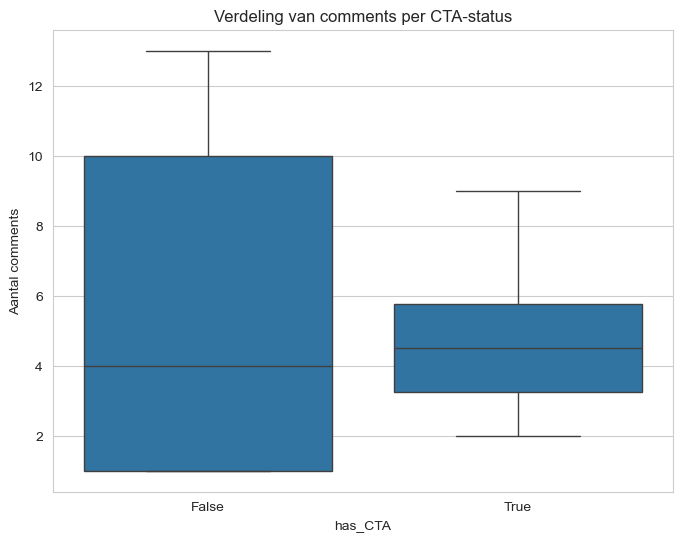

In [15]:
# Boxplot om verschil duidelijk te maken
plt.figure(figsize=(8, 6))
sns.boxplot(x=videos['has_CTA'], y=videos['comments'])
plt.title("Verdeling van comments per CTA-status")
plt.xlabel("has_CTA")
plt.ylabel("Aantal comments")
plt.show()

In [16]:
# Mann-Whitney U-test (Non-parametrisch, geen normaalverdeling vereist)
stat, p_value = stats.mannwhitneyu(comments_with_cta, comments_without_cta, alternative='greater')
print(f"Mann-Whitney U-statistiek: {stat}, p-waarde: {p_value}")

Mann-Whitney U-statistiek: 15.5, p-waarde: 0.5


|Gezien een p-waarde van 0.5 > 0.05, kan de nulhypothese niet worden verworpen op basis van dit onderzoek. Er is geen bewijs dat video's met een CTA een impact heeft op het aantal comments.

In [17]:
# Effectgrootte: Cliff’s delta
def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    return (np.sum(x[:, None] > y) - np.sum(x[:, None] < y)) / (len(x) * len(y))

delta = cliffs_delta(comments_with_cta, comments_without_cta)
print(f"Cliff's Delta: {delta}")

Cliff's Delta: 0.03333333333333333


Een effectgrootte van 0.033 duidt op een verwaarloosbaar effect. Ook hier moeten we concluderen dat video's met een CTA niet significant meer comments genereren dan video's zonder CTA.

Belangrijk is om dit in perspectief te plaatsen, gezien de beperkte grootte van de steekproef. Het is mogelijk dat een grotere steekproefomvang een significant effect zou aantonen. Dit kan verder onderzocht worden in toekomstig onderzoek.